In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Software Defect Prediction/jm1.csv')

In [4]:
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False


In [5]:
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [7]:
data=data[((data['uniq_Op']!='?')&(data['uniq_Opnd']!='?')&(data['total_Op']!='?')&(data['total_Opnd']!='?')&(data['branchCount']!='?'))]

In [8]:
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False


In [9]:
def convertToFloat(column):
    s=data[column].convert_dtypes()
    pd.to_numeric(s, errors='coerce').convert_dtypes()
    return [float(val) for val in s]
data['uniq_Op']=convertToFloat('uniq_Op')
data['uniq_Opnd']=convertToFloat('uniq_Opnd')
data['total_Op']=convertToFloat('total_Op')
data['total_Opnd']=convertToFloat('total_Opnd')
data['branchCount']=convertToFloat('branchCount')

<ipython-input-9-2b3fac03c8f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['uniq_Op']=convertToFloat('uniq_Op')
<ipython-input-9-2b3fac03c8f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['uniq_Opnd']=convertToFloat('uniq_Opnd')
<ipython-input-9-2b3fac03c8f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [10]:
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            108

In [12]:
data['defects']=[1 if val==True else 0 for val in data['defects']]

<ipython-input-12-974b7b0ecc11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['defects']=[1 if val==True else 0 for val in data['defects']]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
def scaleData(x):
    df_scaled_x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    df_scaled_x=df_scaled_x.dropna(axis=0)
    return df_scaled_x

In [15]:
y=data['defects']
X=data.drop(['defects'],axis=1)

In [16]:
X

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1279.39,51,10,8,1,17.0,36.0,112.0,86.0,13.0
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,4122.37,129,29,28,2,17.0,135.0,329.0,271.0,5.0
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,572.07,28,1,6,0,11.0,16.0,76.0,50.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,98.38,13,0,2,0,10.0,15.0,30.0,22.0,7.0
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,59.43,5,0,2,0,12.0,8.0,19.0,11.0,3.0
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,762.04,29,1,10,0,18.0,15.0,59.0,44.0,7.0
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,68.98,6,0,2,0,9.0,8.0,21.0,15.0,1.0


**Select the top 5 features using chi-squared**

In [17]:
def bestKFeatures(X,y,k):
    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit_transform(X, y)
    filter=selector.get_support()
    return filter

In [18]:
best_k_features=bestKFeatures(X,y,10)
X=X[X.columns[best_k_features]]

In [19]:
best_k_features

array([ True, False, False, False,  True,  True, False, False, False,
        True, False,  True,  True, False, False, False, False,  True,
        True,  True,  True])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.2, random_state = 7)
defects=0
non_defects=0
for val in y_train:
    if val==1:
        defects=defects+1
    else:
        non_defects=non_defects+1
print(defects,non_defects)

1718 6986


**Log filter**

In [21]:
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

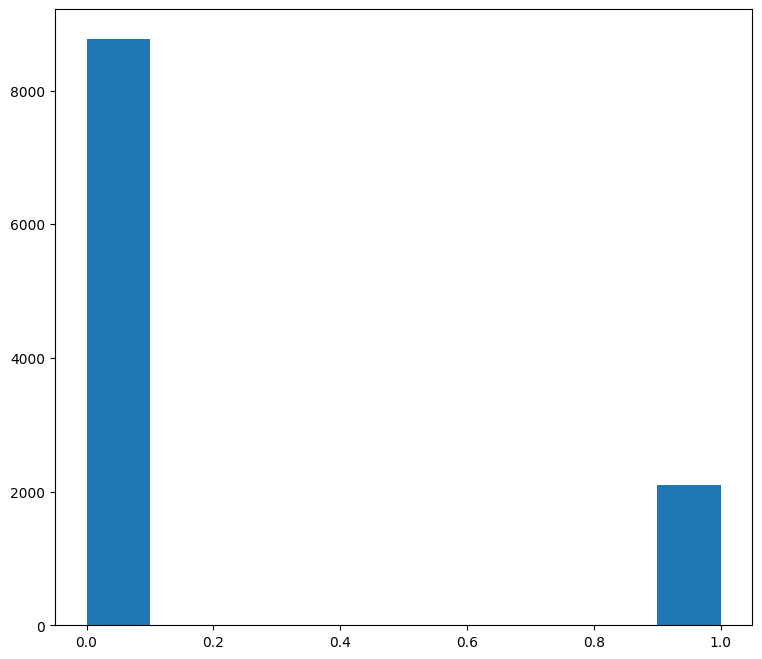

In [22]:
fig,ax=plt.subplots(figsize=(9,8))
ax.hist(data['defects'])
plt.show()

**Random Oversampling**

In [23]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority',random_state=42)
def apply_ROS(X_train,y_train):
    print("Before Random OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
    print("Before Random OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

    X_over_train, y_over_train = oversample.fit_resample(X_train, y_train)

    print("After Random OverSampling, counts of label '1': {}".format(sum(y_over_train == 1)))
    print("After Random OverSampling, counts of label '0': {}".format(sum(y_over_train == 0)))
    return ['Random oversampling',X_over_train, y_over_train]

**Under sampling**

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority',random_state=42)
def apply_RUS(X_train,y_train):
    print("Before Random UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
    print("Before Random UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
    X_under_train, y_under_train = rus.fit_resample(X_train, y_train)

    print("After Random UnderSampling, counts of label '1': {}".format(sum(y_under_train == 1)))
    print("After Random UnderSampling, counts of label '0': {}".format(sum(y_under_train == 0)))
    return ['Random Undersampling',X_under_train,y_under_train]

**Random undersampling balanced**

In [25]:
rus = RandomUnderSampler(sampling_strategy='auto',random_state=42)
def apply_RUS_bal(X_train,y_train):
    print("Before Random UnderSampling Balnced, counts of label '1': {}".format(sum(y_train == 1)))
    print("Before Random UnderSampling Balnced, counts of label '0': {} \n".format(sum(y_train == 0)))
    X_under_bal_train, y_under_bal_train = rus.fit_resample(X_train, y_train)

    print("After Random UnderSampling Balnced, counts of label '1': {}".format(sum( y_under_bal_train == 1)))
    print("After Random UnderSampling Balnced, counts of label '0': {}".format(sum(y_under_bal_train == 0)))
    return ['Random Undersampling Balanced',X_under_bal_train,y_under_bal_train]

**SMOTE**

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
sm = SMOTE(random_state = 2)
def apply_smote(X_train,y_train):
    print("Before SMOTE OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
    print("Before SMOTE OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

    X_smote_train, y_smote_train = sm.fit_resample(X_train,y_train.ravel())

    print("After SMOTE OverSampling, counts of label '1': {}".format(sum(y_smote_train == 1)))
    print("After SMOTE OverSampling, counts of label '0': {}".format(sum(y_smote_train == 0)))
    return ['SMOTE Oversampling',X_smote_train, y_smote_train]

**X_train**

In [27]:
X_over_train=pd.DataFrame()
y_over_train=pd.DataFrame()
X_under_train=pd.DataFrame()
y_under_train=pd.DataFrame()
X_smote_train=pd.DataFrame()
y_smote_train=pd.DataFrame()
X_RUS_bal_train=pd.DataFrame()
y_RUS_bal_train=pd.DataFrame()
def get_training_data():
    global X_over_train
    global y_over_train
    global X_under_train
    global y_under_train
    global X_smote_train
    global y_smote_train
    global X_RUS_bal_train
    global y_RUS_bal_train
    returned_data=apply_ROS(X_train,y_train)
    X_over_train=returned_data[1]
    y_over_train=returned_data[2]
    print()

    returned_data=apply_RUS(X_train,y_train)
    X_under_train=returned_data[1]
    y_under_train=returned_data[2]

    print()

    returned_data=apply_smote(X_train,y_train)
    X_smote_train=returned_data[1]
    y_smote_train=returned_data[2]


    print()

    returned_data=apply_RUS_bal(X_train,y_train)
    X_RUS_bal_train=returned_data[1]
    y_RUS_bal_train=returned_data[2]
get_training_data()

Before Random OverSampling, counts of label '1': 1718
Before Random OverSampling, counts of label '0': 6986 

After Random OverSampling, counts of label '1': 6986
After Random OverSampling, counts of label '0': 6986

Before Random UnderSampling, counts of label '1': 1718
Before Random UnderSampling, counts of label '0': 6986 

After Random UnderSampling, counts of label '1': 1718
After Random UnderSampling, counts of label '0': 1718

Before SMOTE OverSampling, counts of label '1': 1718
Before SMOTE OverSampling, counts of label '0': 6986 

After SMOTE OverSampling, counts of label '1': 6986
After SMOTE OverSampling, counts of label '0': 6986

Before Random UnderSampling Balnced, counts of label '1': 1718
Before Random UnderSampling Balnced, counts of label '0': 6986 

After Random UnderSampling Balnced, counts of label '1': 1718
After Random UnderSampling Balnced, counts of label '0': 1718


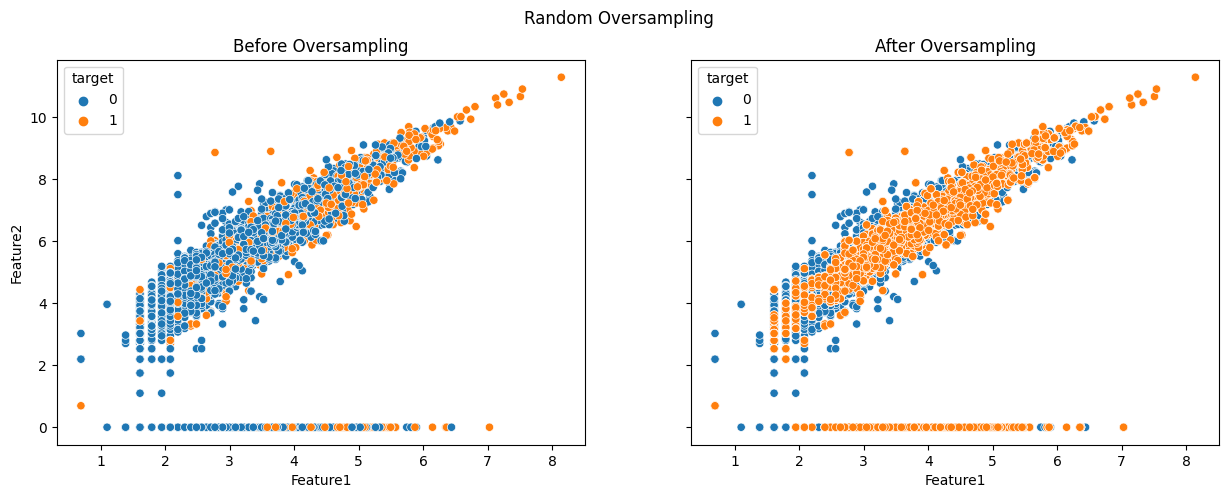

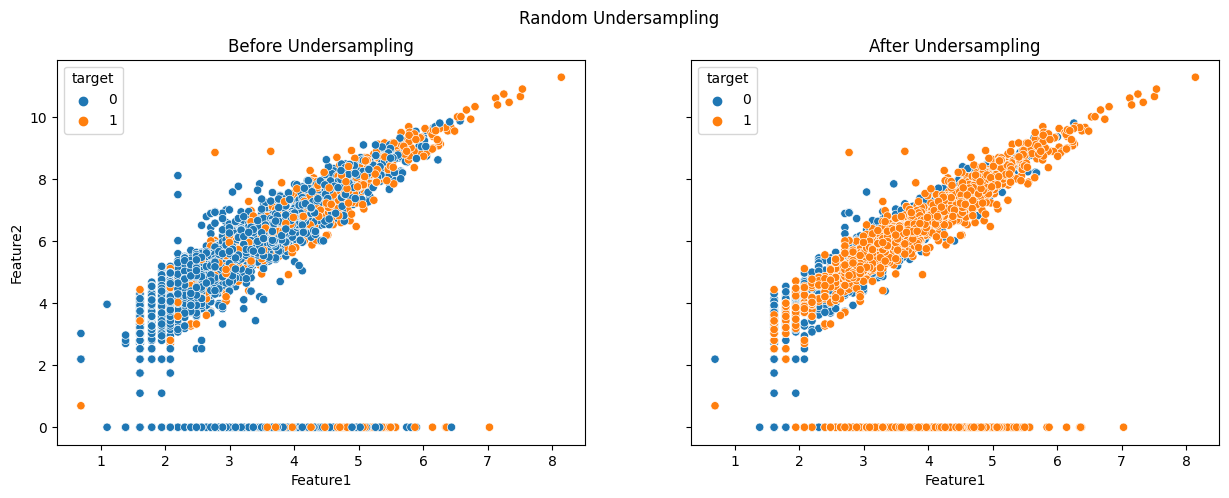

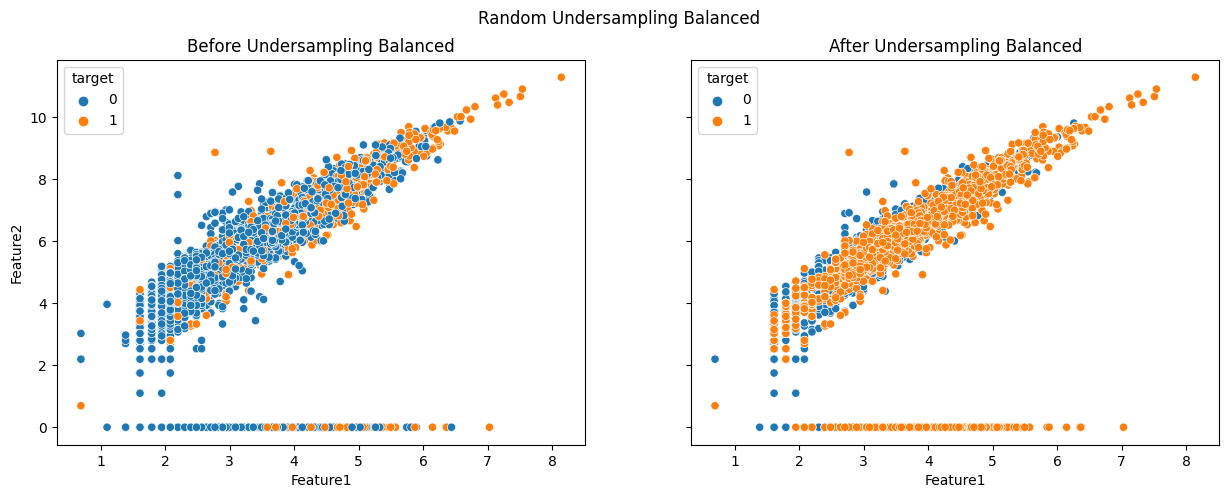

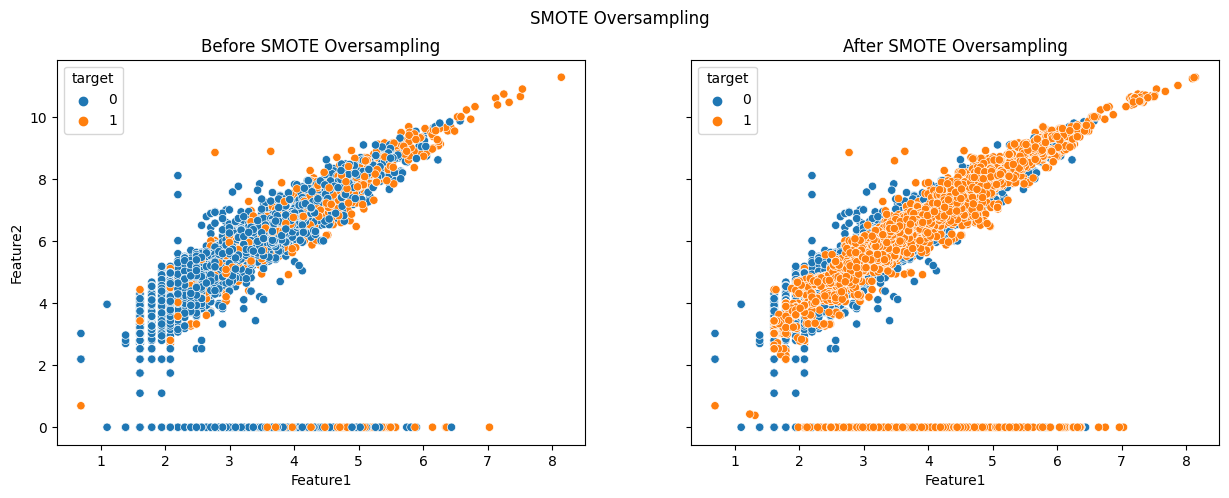

In [28]:
import seaborn as sns

#Random Oversampling graph
def draw_plots_of_sampling(feature1,feature2):
    df_before_random=pd.DataFrame({'Feature1':X_train[feature1],'Feature2':X_train[feature2],'target':y_train})
    df_after_random=pd.DataFrame({'Feature1':X_over_train[feature1],'Feature2':X_over_train[feature2],'target':y_over_train})

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle('Random Oversampling')


    sns.scatterplot(ax=axes[0], x='Feature1',y='Feature2',hue='target',data=df_before_random)
    axes[0].set_title('Before Oversampling')


    sns.scatterplot(ax=axes[1], x='Feature1',y='Feature2',hue='target',data=df_after_random)
    axes[1].set_title('After Oversampling')


    #Random Undersampling graph
    df_before_under=pd.DataFrame({'Feature1':X_train[feature1],'Feature2':X_train[feature2],'target':y_train})
    df_after_under=pd.DataFrame({'Feature1':X_under_train[feature1],'Feature2':X_under_train[feature2],'target':y_under_train})
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle('Random Undersampling')


    sns.scatterplot(ax=axes[0], x='Feature1',y='Feature2',hue='target',data=df_before_under)
    axes[0].set_title('Before Undersampling')


    sns.scatterplot(ax=axes[1], x='Feature1',y='Feature2',hue='target',data=df_after_under)
    axes[1].set_title('After Undersampling')

    #Random Undersampling balanced graph
    df_before_RUS_bal=pd.DataFrame({'Feature1':X_train[feature1],'Feature2':X_train[feature2],'target':y_train})
    df_after_RUS_bal=pd.DataFrame({'Feature1':X_RUS_bal_train[feature1],'Feature2':X_RUS_bal_train[feature2],'target':y_RUS_bal_train})
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle('Random Undersampling Balanced')


    sns.scatterplot(ax=axes[0], x='Feature1',y='Feature2',hue='target',data=df_before_RUS_bal)
    axes[0].set_title('Before Undersampling Balanced')


    sns.scatterplot(ax=axes[1], x='Feature1',y='Feature2',hue='target',data=df_after_RUS_bal)
    axes[1].set_title('After Undersampling Balanced')

    #SMOTE oversampling graph
    df_before_smote=pd.DataFrame({'Feature1':X_train[feature1],'Feature2':X_train[feature2],'target':y_train})
    df_after_smote=pd.DataFrame({'Feature1':X_smote_train[feature1],'Feature2':X_smote_train[feature2],'target':y_smote_train})

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle('SMOTE Oversampling')


    sns.scatterplot(ax=axes[0], x='Feature1',y='Feature2',hue='target',data=df_before_smote)
    axes[0].set_title('Before SMOTE Oversampling')


    sns.scatterplot(ax=axes[1], x='Feature1',y='Feature2',hue='target',data=df_after_smote)
    axes[1].set_title('After SMOTE Oversampling')
draw_plots_of_sampling('loc','v')

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = GaussianNB()
model_params = {
    'Decision_Tree':{
        'model':tree.DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini','entropy'],
            'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:5}, {0:1, 1:10}]
        },

    },
    'GaussianNB':{
        'model':GaussianNB(),
        'params' : {

        }},
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:5}, {0:1, 1:10}]
        },
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:5}, {0:1, 1:10}]
        },

    },
}

In [30]:
training_model_thresholds = {
    'Decision_Tree':{'area':0,'threshold':0.5},
    'GaussianNB':{'area':0,'threshold':0.5},
    'random_forest': {'area':0,'threshold':0.5},
    'logistic_regression' : {'area':0,'threshold':0.5}
}

In [31]:
def plot_roc_curve(fpr, tpr,color,i,threshold,aucArea,model_name):
    aucArea=round(aucArea,5)
    threshold=round(threshold,5)
    plt.plot(fpr, tpr, color=color)
    plt.plot([0, 1], [0, 1], color=color, label='ROC {kthFold} OptTh: {threshold} auc: {aucArea}'.format(kthFold=i,threshold=threshold,aucArea=aucArea), linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for {}'.format(model_name))
    plt.legend()

**Threshold moving**

In [32]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
# model = LinearRegression()
cv = model_selection.StratifiedKFold(n_splits = 10)
colors=['red','gray','orange','yellow','pink','green','brown','black','silver','blue']

training_model_thresholds = {
    'Decision_Tree':{'area':0,'threshold':0.5},
    'GaussianNB':{'area':0,'threshold':0.5},
    'random_forest': {'area':0,'threshold':0.5},
    'logistic_regression' : {'area':0,'threshold':0.5}
}

def get_roc_curves():
    def drawROC(model,model_name):
        for i, (train, test) in enumerate(cv.split(X, y)):
            model.fit(X.iloc[train],y.iloc[train])
            y_pred_GB=model.predict_proba(X.iloc[test])
            fpr, tpr, thresholds = roc_curve(y.iloc[test], y_pred_GB[:,1])
            aucArea=roc_auc_score(y.iloc[test], y_pred_GB[:,1])

            gmean = np.sqrt(tpr * (1 - fpr))
            optimal_idx = np.argmax(gmean)
            optimal_gmean=gmean[optimal_idx]
            # optimal_idx = np.argmax(tpr - fpr)
            optimal_fpr = round(fpr[optimal_idx], ndigits = 4)
            optimal_tpr = round(tpr[optimal_idx], ndigits = 4)
            optimal_threshold = thresholds[optimal_idx]

            if(training_model_thresholds[model_name]['area']<aucArea):
                training_model_thresholds[model_name]['area']=aucArea
                training_model_thresholds[model_name]['threshold']=optimal_threshold

            # print("Threshold value is:", optimal_threshold)
            plot_roc_curve(fpr, tpr,colors[i],i,optimal_threshold,aucArea,model_name)
        plt.show()

    drawROC(GaussianNB(),"GaussianNB")
    drawROC(tree.DecisionTreeClassifier(),'Decision_Tree')
    drawROC(RandomForestClassifier(),'random_forest')
    drawROC(LogisticRegression(solver='liblinear',multi_class='auto'),'logistic_regression')

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import make_scorer, accuracy_score,roc_auc_score,balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

best_measures={
    'Decision_Tree':{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
    'GaussianNB':{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
    'random_forest':{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
    'logistic_regression' :{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
}



means_of_measures={
    'balanced_accuracy':[],
    'accuracy':[],
    'gmean':[],
    'roc_auc':[]

}
def getPerformance(model_name,model,params,X_train,y_train,scoring,refit,imbtech):
    grid_search = GridSearchCV(model, params,refit=refit, scoring=scoring, cv=10)

    # Fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and corresponding score
    print(model_name)
    print("Best Parameters: ", grid_search.best_params_)
    print("Best {score} Score: ".format(score=refit), grid_search.best_score_)
    if(best_measures[model_name][refit]['score']< grid_search.best_score_):
        best_measures[model_name][refit]['score']=grid_search.best_score_
        best_measures[model_name][refit]['imbtech']=imbtech
scoring = {
    'balance':make_scorer(balanced_accuracy_score),
    'accuracy': make_scorer(accuracy_score),
    'Gmean': make_scorer(geometric_mean_score),
    'AUC': make_scorer(roc_auc_score,greater_is_better=True)
}

In [ ]:
def get_best_measure():
    for model_name, mp in model_params.items():
        getPerformance(model_name,mp['model'],mp['params'],X_train,y_train,scoring['balance'],'balanced_accuracy','Normal')
        getPerformance(model_name,mp['model'],mp['params'],X_train,y_train,scoring['accuracy'],'accuracy','Normal')
        getPerformance(model_name,mp['model'],mp['params'],X_train,y_train,scoring['Gmean'],'gmean','Normal')
        getPerformance(model_name,mp['model'],mp['params'],X_train,y_train,scoring['AUC'],'roc_auc','Normal')
        print()
    for model_name, mp in model_params.items():
        getPerformance(model_name,mp['model'],mp['params'],X_smote_train,y_smote_train,scoring['balance'],'balanced_accuracy','Smote')
        getPerformance(model_name,mp['model'],mp['params'],X_smote_train,y_smote_train,scoring['accuracy'],'accuracy','Smote')
        getPerformance(model_name,mp['model'],mp['params'],X_smote_train,y_smote_train,scoring['Gmean'],'gmean','Smote')
        getPerformance(model_name,mp['model'],mp['params'],X_smote_train,y_smote_train,scoring['AUC'],'roc_auc','Smote')
        print()
    for model_name, mp in model_params.items():
        getPerformance(model_name,mp['model'],mp['params'],X_under_train,y_under_train,scoring['balance'],'balanced_accuracy','Under')
        getPerformance(model_name,mp['model'],mp['params'],X_under_train,y_under_train,scoring['accuracy'],'accuracy','Under')
        getPerformance(model_name,mp['model'],mp['params'],X_under_train,y_under_train,scoring['Gmean'],'gmean','Under')
        getPerformance(model_name,mp['model'],mp['params'],X_under_train,y_under_train,scoring['AUC'],'roc_auc','Under')
        print()
    for model_name, mp in model_params.items():
        getPerformance(model_name,mp['model'],mp['params'],X_over_train,y_over_train,scoring['balance'],'balanced_accuracy','Over')
        getPerformance(model_name,mp['model'],mp['params'],X_over_train,y_over_train,scoring['accuracy'],'accuracy','Over')
        getPerformance(model_name,mp['model'],mp['params'],X_over_train,y_over_train,scoring['Gmean'],'gmean','Over')
        getPerformance(model_name,mp['model'],mp['params'],X_over_train,y_over_train,scoring['AUC'],'roc_auc','Over')
        print()
    for model_name, mp in model_params.items():
        getPerformance(model_name,mp['model'],mp['params'],X_RUS_bal_train,y_RUS_bal_train,scoring['balance'],'balanced_accuracy','RUS')
        getPerformance(model_name,mp['model'],mp['params'],X_RUS_bal_train,y_RUS_bal_train,scoring['accuracy'],'accuracy','RUS')
        getPerformance(model_name,mp['model'],mp['params'],X_RUS_bal_train,y_RUS_bal_train,scoring['Gmean'],'gmean','RUS')
        getPerformance(model_name,mp['model'],mp['params'],X_RUS_bal_train,y_RUS_bal_train,scoring['AUC'],'roc_auc','RUS')
        print()
get_best_measure()

Decision_Tree
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy'}
Best balanced_accuracy Score:  0.5932776802896192
Decision_Tree
Best Parameters:  {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy'}
Best accuracy Score:  0.7411500851181757
Decision_Tree
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy'}
Best gmean Score:  0.5446496532376053
Decision_Tree
Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy'}
Best roc_auc Score:  0.5964767894225724

GaussianNB
Best Parameters:  {}
Best balanced_accuracy Score:  0.6255340501725486
GaussianNB
Best Parameters:  {}
Best accuracy Score:  0.7508051255658049
GaussianNB
Best Parameters:  {}
Best gmean Score:  0.5898213077319665
GaussianNB
Best Parameters:  {}
Best roc_auc Score:  0.6255340501725486

random_forest
Best Parameters:  {'class_weight': 'balanced', 'n_estimators': 5}
Best balanced_accuracy Score:  0.5897960775781064
random_forest
Best Parameters:  {'class_weight': {0: 1, 1: 2

In [ ]:
best_measures

In [ ]:
for key,scores in best_measures.items():
    for key2,measure in scores.items():
        means_of_measures[key2].append(measure['score'])
means_of_measures

**CM1 dataset**

In [ ]:
#Re initialize for cm1
best_measures={
    'Decision_Tree':{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
    'GaussianNB':{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
    'random_forest':{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
    'logistic_regression' :{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
}

means_of_measures={
    'balanced_accuracy':[],
    'accuracy':[],
    'gmean':[],
    'roc_auc':[]

}

In [ ]:
from scipy.io import arff
import pandas as pd

cm1_data = arff.loadarff('/content/drive/MyDrive/Software Defect Prediction/CM1.arff')
cm1_data = pd.DataFrame(cm1_data[0])
cm1_data.head()

In [ ]:
cm1_data.isnull().sum()

In [ ]:
cm1_data.info()

In [ ]:
cm1_data['Defective']=[1 if val==b'Y' else 0 for val in cm1_data['Defective']]

In [ ]:
cm1_data.info()

In [ ]:
print('Defective count',sum(cm1_data['Defective']==1))
print('Non Defective count',sum(cm1_data['Defective']==0))

In [ ]:
fig,ax=plt.subplots(figsize=(9,8))
ax.hist(cm1_data['Defective'])
plt.show()

In [ ]:
X=cm1_data.drop(['Defective'],axis=1)
y=cm1_data['Defective']

In [ ]:
best_k_features=bestKFeatures(X,y,10)
X=X[X.columns[best_k_features]]
X

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.2, random_state = 7)

**Log filter**

In [ ]:
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

In [ ]:
get_training_data() # change features to be plot

In [ ]:
draw_plots_of_sampling('LOC_EXECUTABLE','HALSTEAD_EFFORT')

In [ ]:
get_roc_curves()

In [ ]:
get_best_measure()

In [ ]:
best_measures

In [ ]:
for key,scores in best_measures.items():
    for key2,measure in scores.items():
        means_of_measures[key2].append(measure['score'])
means_of_measures

**KC1 Dataset**

In [ ]:
#Re initialize for kc1
best_measures={
    'Decision_Tree':{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
    'GaussianNB':{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
    'random_forest':{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
    'logistic_regression' :{'balanced_accuracy':{'score':0,'imbtech':'none'},'accuracy':{'score':0,'imbtech':'none'},'gmean':{'score':0,'imbtech':'none'},'roc_auc':{'score':0,'imbtech':'none'}},
}

means_of_measures={
    'balanced_accuracy':[],
    'accuracy':[],
    'gmean':[],
    'roc_auc':[]

}

In [ ]:
from scipy.io import arff
import pandas as pd

kc1_data = arff.loadarff('/content/drive/MyDrive/Software Defect Prediction/KC1.arff')
kc1_data = pd.DataFrame(kc1_data[0])
kc1_data.head()

In [ ]:
kc1_data.isnull().sum()

In [ ]:
kc1_data.info()

In [ ]:
# defective key may be change
kc1_data['Defective']=[1 if val==b'Y' else 0 for val in kc1_data['Defective']]

In [ ]:
kc1_data.info()

In [ ]:
# defective key may be change
print('Defective count',sum(kc1_data['Defective']==1))
print('Non Defective count',sum(kc1_data['Defective']==0))

In [ ]:
fig,ax=plt.subplots(figsize=(9,8))
ax.hist(kc1_data['Defective'])
plt.show()

In [ ]:
X=kc1_data.drop(['Defective'],axis=1)
y=kc1_data['Defective']

In [ ]:
best_k_features=bestKFeatures(X,y,10)
X=X[X.columns[best_k_features]]
X

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.2, random_state = 7)

In [ ]:
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

In [ ]:
get_training_data() # change features to be plot

In [ ]:
draw_plots_of_sampling('LOC_EXECUTABLE','HALSTEAD_EFFORT') # to be change

In [ ]:
get_roc_curves()

In [ ]:
get_best_measure()

In [ ]:
best_measures

In [ ]:
for key,scores in best_measures.items():
    for key2,measure in scores.items():
        means_of_measures[key2].append(measure['score'])
means_of_measures